Let us calculate the populations $p_i$ for the hyperfine magnetic states of the $5S_{1/2}$ ground state of rubidium in a thermal state. A thermal state has populations

$$p_i=\frac{ \exp{(-E_i/k_B T)} }{Z} \hspace{1cm} Z=\sum_j \exp{(-E_j/k_B T)} $$

where $E_i$ are the energies of each state and $k_B$ is Boltzman's constant.

In [1]:
from fast.atomic_structure import State, make_list_of_states, thermal_state
from sympy import Integer
from math import pi,exp,log
import numpy as np

In [2]:
element="Rb"; iso=85
ground=State(element,iso,5,0,1/Integer(2))
ground

85Rb 5S_1/2

In [3]:
magnetic_states=make_list_of_states([ground],"magnetic")
for state in magnetic_states:
    print state

85Rb 5S_1/2^2,-2
85Rb 5S_1/2^2,-1
85Rb 5S_1/2^2,0
85Rb 5S_1/2^2,1
85Rb 5S_1/2^2,2
85Rb 5S_1/2^3,-3
85Rb 5S_1/2^3,-2
85Rb 5S_1/2^3,-1
85Rb 5S_1/2^3,0
85Rb 5S_1/2^3,1
85Rb 5S_1/2^3,2
85Rb 5S_1/2^3,3


In [4]:
e1=magnetic_states[0]

In [5]:
from scipy.constants import physical_constants
hbar=physical_constants["Planck constant over 2 pi"][0] # J s
kB  =physical_constants["Boltzmann constant"][0] #        J/K

In [6]:
T=20#Celsius degrees.
T=T+237.15 #Kelvin
print T

257.15


In [7]:
omega_level = [ei.omega for ei in magnetic_states]
omega_level

[-11126543656.227257,
 -11126543656.227257,
 -11126543656.227257,
 -11126543656.227257,
 -11126543656.227257,
 7947531183.019468,
 7947531183.019468,
 7947531183.019468,
 7947531183.019468,
 7947531183.019468,
 7947531183.019468,
 7947531183.019468]

So the populations are:

In [8]:
p = thermal_state(omega_level, T, return_diagonal=True)
print p

[ 0.08336088  0.08336088  0.08336088  0.08336088  0.08336088  0.08331366
  0.08331366  0.08331366  0.08331366  0.08331366  0.08331366  0.08331366]


Which is close to assigning populations equally:

In [9]:
p_deg = np.array([1.0/len(magnetic_states) for i in range(len(magnetic_states))])
print p_deg

[ 0.08333333  0.08333333  0.08333333  0.08333333  0.08333333  0.08333333
  0.08333333  0.08333333  0.08333333  0.08333333  0.08333333  0.08333333]


Let's make a plot of the variation with temperature.

In [10]:
a = 5
P1 = sum(p[:a])
P2 = sum(p[a:])
print P1,P2

0.41680438001 0.58319561999


In [11]:
def get_energies(element, iso):
    if element=="Rb":
        ground=State(element,iso,5,0,1/Integer(2))
    else:
        ground=State(element,iso,6,0,1/Integer(2))
    magnetic_states=make_list_of_states([ground],"magnetic")
    E=[hbar*2*pi*e.nu for e in magnetic_states]
    return E

In [12]:
def pops(T, E, element, iso):
    if iso ==133:
        a=7
    elif iso ==85:
        a=5
    else:
        a=3
    
    if element=="Rb":
        ground=State(element,iso,5,0,1/Integer(2))
    else:
        ground=State(element,iso,6,0,1/Integer(2))
    magnetic_states=make_list_of_states([ground],"magnetic")
    
    Z=sum([exp(-E[i]/kB/T) for i in range(len(magnetic_states))])
    p=[exp(-E[i]/kB/T)/Z for i in range(len(magnetic_states))]
    return p[0],p[-1],sum(p[:a]),sum(p[a:])

In [13]:
T = np.logspace(-2, 3, 201)

In [14]:
omega_level85 = make_list_of_states([State("Rb", 85, 5, 0, 1/Integer(2))], "magnetic")
omega_level85 = [ei.omega for ei in omega_level85]

omega_level87 = make_list_of_states([State("Rb", 87, 5, 0, 1/Integer(2))], "magnetic")
omega_level87 = [ei.omega for ei in omega_level87]

omega_level133 = make_list_of_states([State("Cs", 133, 6, 0, 1/Integer(2))], "magnetic")
omega_level133 = [ei.omega for ei in omega_level133]

In [15]:
dat = np.array([thermal_state(omega_level85, Ti, return_diagonal=True) for Ti in T])
Flow = 2
p185 = dat[:,0]
p285 = dat[:,2*Flow+1+1]
P185 = dat[:,0]*(2*Flow+1)
P285 = dat[:,6]*(2*(Flow+1)+1)

In [16]:
dat = np.array([thermal_state(omega_level87, Ti, return_diagonal=True) for Ti in T])
Flow = 1
p187 = dat[:,0]
p287 = dat[:,2*Flow+1+1]
P187 = dat[:,0]*(2*Flow+1)
P287 = dat[:,6]*(2*(Flow+1)+1)

In [17]:
dat = np.array([thermal_state(omega_level133, Ti, return_diagonal=True) for Ti in T])
Flow = 3
p1133 = dat[:,0]
p2133 = dat[:,2*Flow+1+1]
P1133 = dat[:,0]*(2*Flow+1)
P2133 = dat[:,7]*(2*(Flow+1)+1)

In [18]:
from matplotlib import pyplot
plots_path="folder_09___Thermal_States/" 
%matplotlib inline

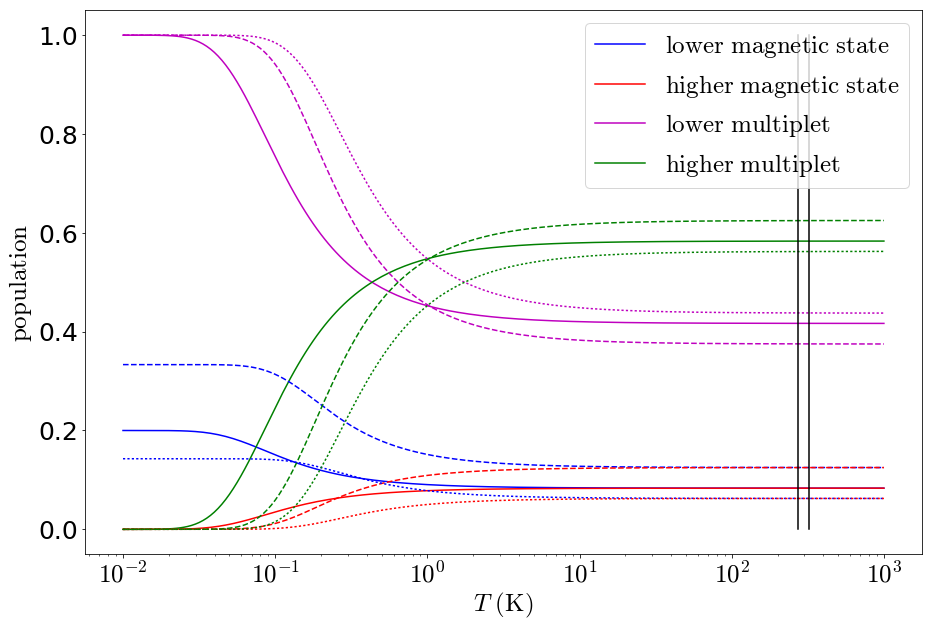

In [19]:
pyplot.close("all")
pyplot.figure(figsize=(15, 10))
pyplot.semilogx(T,p185,"b",label=r"$\mathrm{lower \ magnetic \ state}$")
pyplot.semilogx(T,p285,"r",label=r"$\mathrm{higher \ magnetic \ state}$")
pyplot.semilogx(T,P185,"m",label=r"$\mathrm{lower  \ multiplet}$")
pyplot.semilogx(T,P285,"g",label=r"$\mathrm{higher \ multiplet}$")

pyplot.semilogx(T,p187,"b--")
pyplot.semilogx(T,p287,"r--")
pyplot.semilogx(T,P187,"m--")
pyplot.semilogx(T,P287,"g--")

pyplot.semilogx(T,p1133,"b:")
pyplot.semilogx(T,p2133,"r:")
pyplot.semilogx(T,P1133,"m:")
pyplot.semilogx(T,P2133,"g:")

pyplot.semilogx([273.15,273.15],[0,1],"k")
pyplot.semilogx([273.15+50,273.15+50],[0,1],"k")

pyplot.ylabel(r"$\mathrm{population}$",fontsize=25)
pyplot.xlabel(r"$T \ \mathrm{(K)}$",fontsize=25)
pyplot.legend(fontsize=25)
pyplot.tick_params(labelsize=25)

#pyplot.ylim([0, 1])
pyplot.savefig(plots_path+"/01_populations.png",bbox_inches="tight")

Here solid lines show the populations for $^{85}\mathrm{Rb}$, dashed lines for $^{87}\mathrm{Rb}$, and dotted lines for $^{133}\mathrm{Cs}$. We can see that $^{85}\mathrm{Rb}$ is thermalized at slightly lower temperatures than $^{87}\mathrm{Rb}$: at about 5 and 10 Kelvin respectively all magnetic states reach the same population.

In [20]:
def entropy(p1,p2,iso):
    if iso==133:
        n1=7; n2=9
    elif iso==85:
        n1=5; n2=7
    elif iso==87:
        n1=3; n2=5
    return - kB*(n1*p1*log(p1) + n2*p2*log(p2))

In [21]:
S85 =[entropy(p185[i], p285[i], 85) for i in range(len(p185))]
S87 =[entropy(p187[i], p287[i], 87) for i in range(len(p187))]
S133=[entropy(p1133[i],p2133[i],133) for i in range(len(p187))]

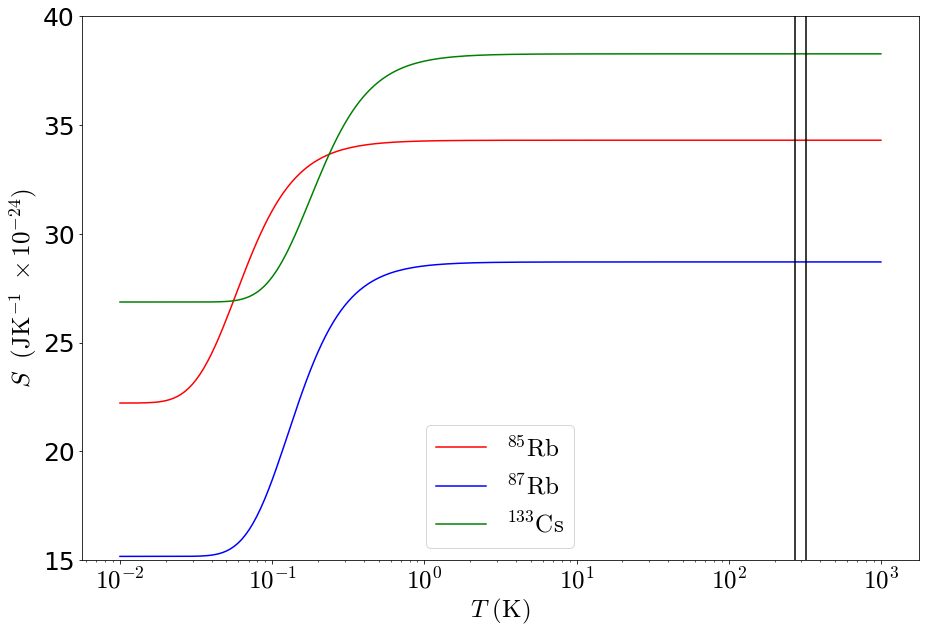

In [22]:
pyplot.close("all")
pyplot.figure(figsize=(15, 10))
pyplot.semilogx(T,np.array(S85)*1e24, "r",label=r"$^{85}  \mathrm{Rb}$")
pyplot.semilogx(T,np.array(S87)*1e24, "b",label=r"$^{87}  \mathrm{Rb}$")
pyplot.semilogx(T,np.array(S133)*1e24,"g",label=r"$^{133} \mathrm{Cs}$")

pyplot.semilogx([273.15,273.15]      ,[1.5e-23*1e24,4e-23*1e24],"k")
pyplot.semilogx([273.15+50,273.15+50],[1.5e-23*1e24,4e-23*1e24],"k")

pyplot.ylabel(r"$S \ \ \mathrm{(J K^{-1} \ \times 10^{-24})}$",fontsize=25)
pyplot.xlabel(r"$T \ \mathrm{(K)}$",fontsize=25)
pyplot.ylim([15, 40])
pyplot.legend(fontsize=25,loc="lower center")
pyplot.tick_params(labelsize=25)
pyplot.savefig(plots_path+"/02_entropy.png",bbox_inches="tight")

In [23]:
def average_energy(p1,p2,iso):
    if iso==133:
        n1=7; n2=9; element="Cs" 
    elif iso==85:
        n1=5; n2=7; element="Rb" 
    elif iso==87:
        n1=3; n2=5; element="Rb" 
    
    E=get_energies(element,iso)
    E1=E[0]; E2=E[-1]
    return (n1*p1*E1 + n2*p2*E2)*1e-9/hbar/2/pi

In [24]:
E85 =[average_energy(p185[i], p285[i], 85) for i in range(len(p185))]
E87 =[average_energy(p187[i], p287[i], 87) for i in range(len(p187))]
E133=[average_energy(p1133[i],p2133[i],133) for i in range(len(p187))]

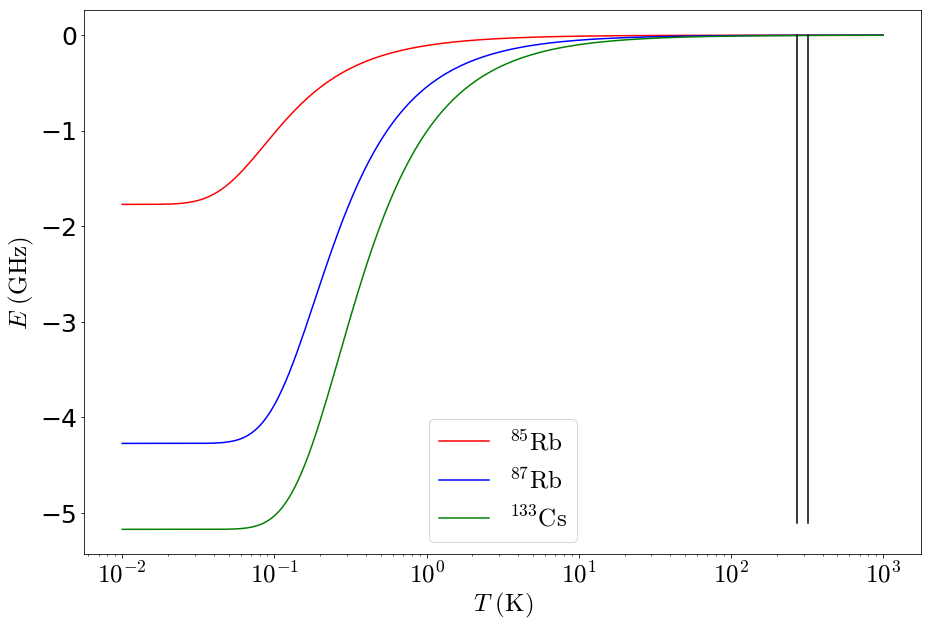

In [25]:
pyplot.close("all")
pyplot.figure(figsize=(15, 10))
pyplot.semilogx(T,E85, "r",label=r"$^{85}  \mathrm{Rb}$")
pyplot.semilogx(T,E87, "b",label=r"$^{87}  \mathrm{Rb}$")
pyplot.semilogx(T,E133,"g",label=r"$^{133} \mathrm{Cs}$")

pyplot.semilogx([273.15,273.15]      ,[-5.1,0],"k")
pyplot.semilogx([273.15+50,273.15+50],[-5.1,0],"k")

pyplot.ylabel(r"$E \ \mathrm{(GHz)}$", fontsize=25)
pyplot.xlabel(r"$T \ \mathrm{(K)}$", fontsize=25)
pyplot.legend(fontsize=25, loc="lower center")
pyplot.tick_params(labelsize=25)

pyplot.savefig(plots_path+"/03_energy.png",bbox_inches="tight")

# An atom in thermal equilibrium
Let us solve the master equation found in [1]. These are simply the usual Bloch equations for a two level system.

In [26]:
from fast import *
from sympy import oo,exp,I
init_printing()
use_unicode=True
use_unicode=False

In [27]:
hbar,k,omega2,T,gamma,n=symbols("hbar k omega2 T gamma n",positive=True)
omega1=symbols("omega1",negative=True)

In [28]:
Omega=symbols("Omega",real=True)
delta=symbols("delta",real=True)

In [29]:
H=hbar*Matrix([[delta,Omega.conjugate()/2],[Omega/2,0]])

In [30]:
rho=define_density_matrix(2,explicitly_hermitian=True,normalized=True)

In [31]:
eqs =I/hbar*(rho*H-H*rho)

However, instead of the usual Lindblad terms, we will use the following

In [32]:
eqs+=(1+n)*gamma*lindblad_operator(ketbra(1,2,2),rho)
eqs+=(  n)*gamma*lindblad_operator(ketbra(2,1,2),rho)

Where $\bar{n}$ is the "mean photon number" here simply defined as 

In [33]:
ns=exp(-hbar*(omega2-omega1)/k/T)/(1-exp(-hbar*(omega2-omega1)/k/T))
ns=1/(exp(hbar*(omega2-omega1)/k/T)-1)
pprint(ns,use_unicode=use_unicode)

             1              
----------------------------
 hbar*(-omega1 + omega2)    
 -----------------------    
           T*k              
e                        - 1


Where $\omega_1$ and $\omega_2$ are the energy frequencies of our two states, and $T$ will become our definition of temperature. We solve these equations for the steady state. Notice that $n\rightarrow0$ as $T\rightarrow0$  and $n \rightarrow\infty$ as $T\rightarrow \infty$.

In [34]:
print ns.limit(T,0), ns.limit(T,oo)

0 oo


In [35]:
eq2=eqs[1,1].subs({rho[1,0]:re(rho[1,0])+I*im(rho[1,0])}).expand()
eq3=re(eqs[1,0].expand())
eq4=im(eqs[0,1].expand())

In [36]:
sol=solve([eq2,eq3,eq4],[rho[1,1],re(rho[1,0]),im(rho[1,0])])

In [37]:
rho11T=(1-sol[rho[1,1]]).expand().factor()
rho22T=sol[rho[1,1]]
rho21T=(sol[re(rho[1,0])]+I*sol[im(rho[1,0])]).factor()

In [38]:
pprint(rho11T,use_unicode=use_unicode,num_columns=150)

       2          2          2            2          2  3          2  2          2          2
2*Omega *n + Omega  + 4*delta *n + 4*delta  + 4*gamma *n  + 8*gamma *n  + 5*gamma *n + gamma 
---------------------------------------------------------------------------------------------
                       /       2          2          2  2          2          2\             
             (2*n + 1)*\2*Omega  + 4*delta  + 4*gamma *n  + 4*gamma *n + gamma /             


In [39]:
pprint(rho22T,use_unicode=use_unicode,num_columns=150)

     2               /       2        2          2\
Omega *(2*n + 1) + n*\4*delta  + gamma *(2*n + 1) /
---------------------------------------------------
          /       2          2        2          2\
(2*n + 1)*\2*Omega  + 4*delta  + gamma *(2*n + 1) /


In [40]:
pprint(rho21T,use_unicode=use_unicode,num_columns=150)

             -Omega*(-2*delta + 2*I*gamma*n + I*gamma)             
-------------------------------------------------------------------
          /       2          2          2  2          2          2\
(2*n + 1)*\2*Omega  + 4*delta  + 4*gamma *n  + 4*gamma *n + gamma /


Obviously, if we take the temperature to zero, we recover the usual solutions to Bloch equations in the steady state.

In [41]:
pprint(rho11T.limit(n,0),use_unicode=use_unicode)

      2          2        2 
 Omega  + 4*delta  + gamma  
----------------------------
       2          2        2
2*Omega  + 4*delta  + gamma 


In [42]:
pprint(rho22T.limit(n,0),use_unicode=use_unicode)

                2           
           Omega            
----------------------------
       2          2        2
2*Omega  + 4*delta  + gamma 


In [43]:
pprint(rho21T.limit(n,0),use_unicode=use_unicode)

-(-2*Omega*delta + I*Omega*gamma) 
----------------------------------
          2          2        2   
   2*Omega  + 4*delta  + gamma    


Now let's explore what happens when the temperature goes to infinity:

In [44]:
print [rho11T.limit(n,oo), rho22T.limit(n,oo), rho21T.limit(n,oo)]

[1/2, 1/2, 0]


Which is exactly what one would expect of thermal states. Furthermore, at finite temperature, and in the abscence of optical fields

In [45]:
vapour={delta:0,Omega:0}
rho11_vapour=rho11T.subs(vapour).factor()
rho22_vapour=rho22T.subs(vapour).factor()
rho21_vapour=rho21T.subs(vapour)
pprint([rho11_vapour,rho22_vapour,rho21_vapour],use_unicode=use_unicode)

  n + 1      n       
[-------, -------, 0]
 2*n + 1  2*n + 1    


Remarkably, the populations do not depend on the decay frequency $\gamma$! Thus only the temperature determines the populations in the abscence of fields!

Explicitly, the populations are

In [46]:
rho11_vapour=rho11_vapour.subs({n:ns}).expand().factor()
rho22_vapour=rho22_vapour.subs({n:ns}).expand().factor()
pprint([rho11_vapour,rho22_vapour],use_unicode=use_unicode)

          hbar*omega2                  hbar*omega1        
          -----------                  -----------        
              T*k                          T*k            
         e                            e                   
[---------------------------, ---------------------------]
  hbar*omega1    hbar*omega2   hbar*omega1    hbar*omega2 
  -----------    -----------   -----------    ----------- 
      T*k            T*k           T*k            T*k     
 e            + e             e            + e            


We can check that these are in deed thermal states

In [47]:
Z=exp(-hbar*omega1/k/T)+exp(-hbar*omega2/k/T)
rho11_thermal=exp(-hbar*omega1/k/T)/Z
rho22_thermal=exp(-hbar*omega2/k/T)/Z

print [(rho11_vapour-rho11_thermal).simplify(),(rho22_vapour-rho22_thermal).simplify()]

[0, 0]


So we may define a thermalization temperature as the temperature required so that in the abscence of fields, the excited state has population 1/4 (in much the same way as the saturation intensity is defined for the field).

In [48]:
Tterm=solve(rho22_vapour-1/Integer(4),T)[0]
pprint(Tterm,use_unicode=use_unicode)

-hbar*(omega1 - omega2) 
------------------------
        k*log(3)        


Let us now apply this to the hyperfine splittings of the ground states of the alkalis that we examined before, which is very questionable.

In [49]:
g1Rb85=State("Rb",85,5,0,1/Integer(2),2)
g2Rb85=State("Rb",85,5,0,1/Integer(2),3)

g1Rb87=State("Rb",87,5,0,1/Integer(2),1)
g2Rb87=State("Rb",87,5,0,1/Integer(2),2)

g1Cs133=State("Cs",133,6,0,1/Integer(2),3)
g2Cs133=State("Cs",133,6,0,1/Integer(2),4)

In [50]:
from scipy.constants import k as ks
from scipy.constants import hbar as hbars

In [51]:
ns.subs({hbar:hbars,k:ks,omega1:g1Cs133.omega,omega2:g2Cs133.omega,T:293.})

In [52]:
TtermRb85 =Tterm.subs({hbar:hbars,k:ks,omega1: g1Rb85.omega, omega2:g2Rb85.omega}).n()
TtermRb87 =Tterm.subs({hbar:hbars,k:ks,omega1: g1Rb87.omega, omega2:g2Rb87.omega}).n()
TtermCs133=Tterm.subs({hbar:hbars,k:ks,omega1:g1Cs133.omega,omega2:g2Cs133.omega}).n()

print [TtermRb85, TtermRb87, TtermCs133]

[0.132614817483323, 0.298570427225583, 0.401576510739131]


Let us now find the populations for the exited multiplets for a thermal state at these temperatures:

In [53]:
E85 =get_energies("Rb",85)
E87 =get_energies("Rb",87)
E133=get_energies("Cs",133)
print pops(TtermRb85,E85,"Rb",85)[3].subs({hbar:hbars})

0.318181818181818


In [54]:
print pops(TtermRb87,E87,"Rb",87)[3].subs({hbar:hbars})

0.357142857142857


In [55]:
print pops(TtermCs133,E133,"Cs",133)[3].subs({hbar:hbars})

0.300000000000000


If the two level system theory was appropiate for this problem, we should have got 1/4, so we did get pretty good estimates!

In [56]:
pyplot.close("all")

[1] An open systems approach to quantum optics : lectures presented at the Universite Libre de Bruxelles, October 28 to November 4, 1991. Carmichael, Howard.